# Cervical Cancer Risk Prediction
This problem is to classify the risk of a person being tested positive to cervical cancer based on a list of risk factors. The data comes from the UCI Repository and can be further read here https://www.kaggle.com/loveall/cervical-cancer-risk-classification. The dataset can be downloaded here https://www.kaggle.com/loveall/cervical-cancer-risk-classification/download. 
<br>
<br>
The method used for classification was the XGBoost algorithm (which is compared to a SVM classifier) and achieved a validation accuracy of *95.65*%. Furthermore, new test subjects was created to check the risk prediction of the model. 

## Importing packages

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

## Loading and Showing Data

In [4]:
data = [data for data in os.listdir('.') if data.endswith('.csv')][0]
data = pd.read_csv(data) 
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0


In [300]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 34 columns):
Age                                   858 non-null int64
Number of sexual partners             858 non-null float64
First sexual intercourse              858 non-null float64
Num of pregnancies                    858 non-null float64
Smokes                                858 non-null float64
Smokes (years)                        858 non-null float64
Smokes (packs/year)                   858 non-null float64
Hormonal Contraceptives               858 non-null float64
Hormonal Contraceptives (years)       858 non-null float64
IUD                                   858 non-null float64
IUD (years)                           858 non-null float64
STDs                                  858 non-null float64
STDs (number)                         858 non-null float64
STDs:condylomatosis                   858 non-null float64
STDs:cervical condylomatosis          858 non-null float64
STDs:vaginal

## Data cleaning
Can see from the data table that feature *STDs:Time since first diagnosis* and *STDs:Time since last diagnosis* missing alot of values and are thus not giving much information hence removing them completely. 
<br>
<br>
Next, missing data are represented by *?* as seen in the table above which needs to be replaced with for it to be workable.

In [6]:
data.drop(['STDs: Time since first diagnosis','STDs: Time since last diagnosis'],inplace=True,axis=1)

data = data.replace('?', np.NaN)


## Data type extracting
Since some features are numerical data and some are categorical data as seen in the data table, for vizualisation and analyzation purposes, these extracted seperately. 
<br>
<br>
From the table, the following features are numerical

In [7]:
numerical_data = ['Age', 'Number of sexual partners', 'First sexual intercourse','Num of pregnancies', 'Smokes (years)',
                'Smokes (packs/year)','Hormonal Contraceptives (years)','IUD (years)','STDs (number)']

and these are then categorical data

In [8]:
categorical_data = ['Smokes','Hormonal Contraceptives','IUD','STDs','STDs:condylomatosis','STDs:cervical condylomatosis',
                  'STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
                  'STDs:pelvic inflammatory disease', 'STDs:genital herpes','STDs:molluscum contagiosum', 'STDs:AIDS', 
                  'STDs:HIV','STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis','Dx:Cancer', 'Dx:CIN', 
                  'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller','Citology', 'Biopsy']

## More data cleaning
Since the missing values will fuck up the learning process, these are replaced. For the numerical data the values will be replaced by the mean value of that specific feature column and for the categorical data, *1.0* or *0.0* based on the majority of the rest of that feature column. 

In [121]:
# Numerical data
print("Numerical Features:")
for feature in numerical_data:
    print(feature,'',data[feature].convert_objects(convert_numeric=True).mean())
    feature_mean = round(data[feature].convert_objects(convert_numeric=True).mean(),1)
    data[feature] = data[feature].fillna(feature_mean)
    data[feature] = data[feature].convert_objects(convert_numeric=True)
print(' \n')   

# Categorical data
print("Categorical Featues:")
for feature in categorical_data:
    print(feature,'',data[feature].convert_objects(convert_numeric=True).mean())
    if data[feature].convert_objects(convert_numeric=True).mean() >= 0.5:
        data[feature] = data[feature].convert_objects(convert_numeric=True).fillna(1.0)
    else:
        data[feature] = data[feature].convert_objects(convert_numeric=True).fillna(0.0)
    data[feature] = data[feature].convert_objects(convert_numeric=True)  

Numerical Features:
Age  26.82051282051282
Number of sexual partners  2.526806526806527
First sexual intercourse  16.995337995337994
Num of pregnancies  2.2771561771561744
Smokes (years)  1.2194226033041957
Smokes (packs/year)  0.45385389079090926
Hormonal Contraceptives (years)  2.261904896319342
IUD (years)  0.5127855477855479
STDs (number)  0.17948717948717935
 

Categorical Featues:
Smokes  0.14335664335664336
Hormonal Contraceptives  0.6864801864801865
IUD  0.09673659673659674
STDs  0.09207459207459208
STDs:condylomatosis  0.05128205128205128
STDs:cervical condylomatosis  0.0
STDs:vaginal condylomatosis  0.004662004662004662
STDs:vulvo-perineal condylomatosis  0.05011655011655012
STDs:syphilis  0.02097902097902098
STDs:pelvic inflammatory disease  0.0011655011655011655
STDs:genital herpes  0.0011655011655011655
STDs:molluscum contagiosum  0.0011655011655011655
STDs:AIDS  0.0
STDs:HIV  0.02097902097902098
STDs:Hepatitis B  0.0011655011655011655
STDs:HPV  0.002331002331002331
STDs: 

# Data visualization
Data visualization on the numerical data based on the four different types of diagnosis being made - *Hinselmann* test, *Schiller* test, *Citology* test and *Biopsy*. 

In [10]:
diagnosis_type = ['Hinselmann', 'Schiller','Citology', 'Biopsy']

## Age distribution
Histogram of the age distribution of the four different diagnosis types

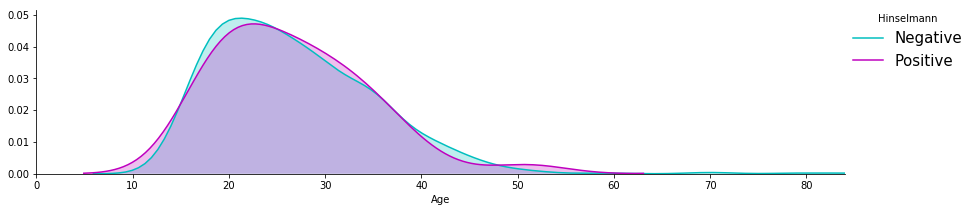

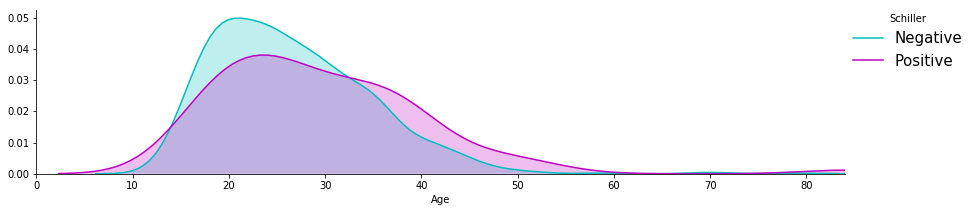

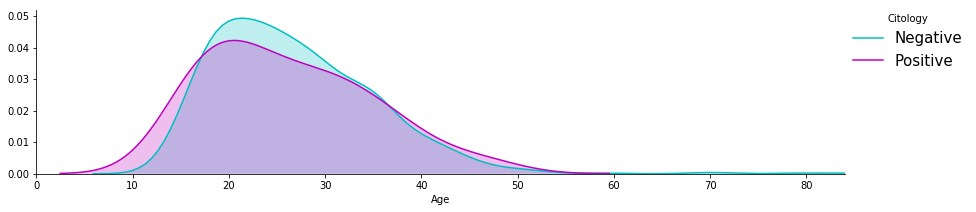

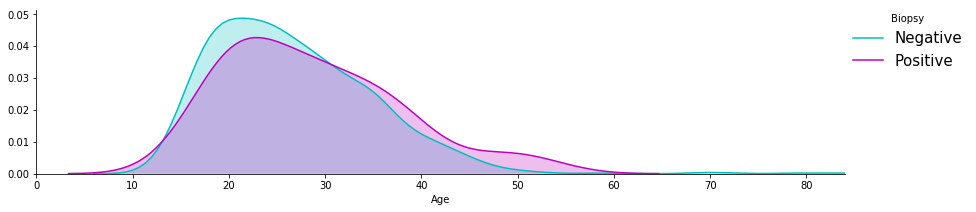

In [11]:
for feature in diagnosis_type:
    fig = sns.FacetGrid(data,hue=feature,aspect=4, palette = ['c', 'm'])
    fig.map(sns.kdeplot,'Age',shade=True)
    oldest = data['Age'].max()
    fig.set(xlim=(0,oldest))
    fig.add_legend(labels=["Negative","Positive"], fontsize='15')

## Number of sexual partners
Histogram of the number of sexual partners for the four different diagnosis types

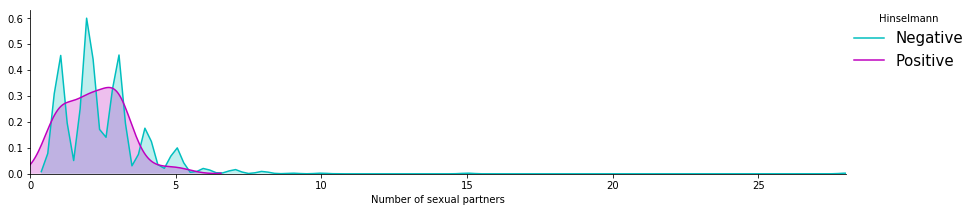

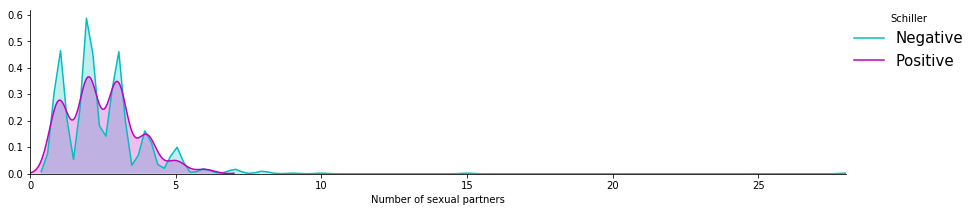

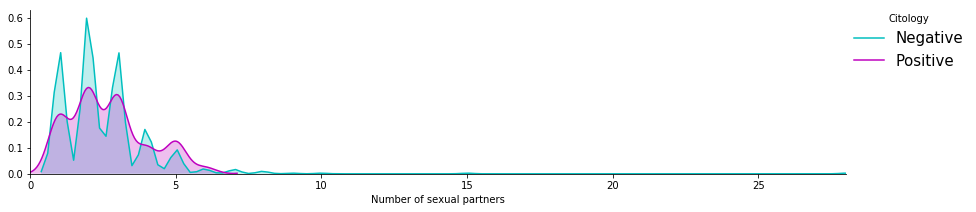

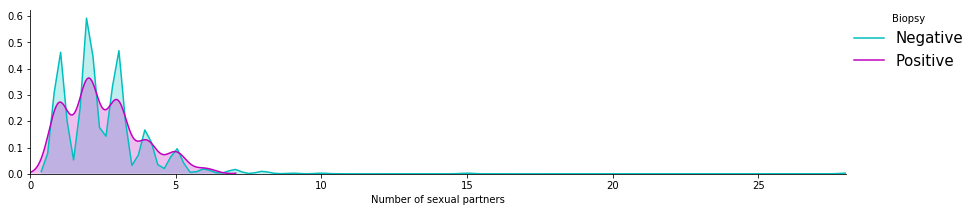

In [12]:
for feature in diagnosis_type:
    fig = sns.FacetGrid(data,hue=feature,aspect=4, palette = ['c', 'm'])
    fig.map(sns.kdeplot,'Number of sexual partners',shade=True)
    oldest = data['Number of sexual partners'].max()
    fig.set(xlim=(0,oldest))
    fig.add_legend(labels=["Negative","Positive"], fontsize='15')


## First sexual intercourse
Histogram of the distribution of the first sexual intercourse on the four different diagnosis types

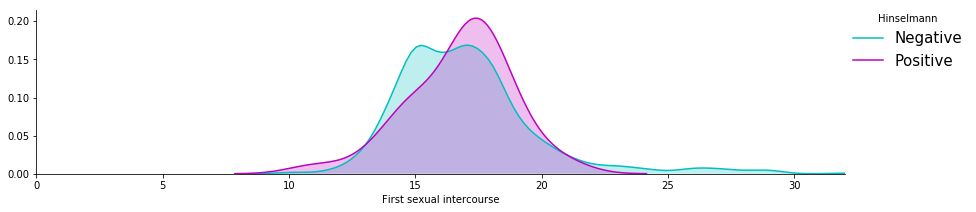

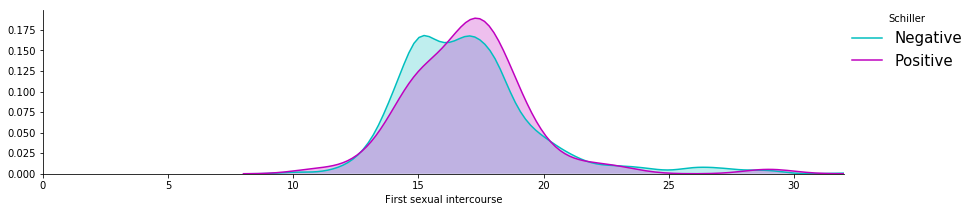

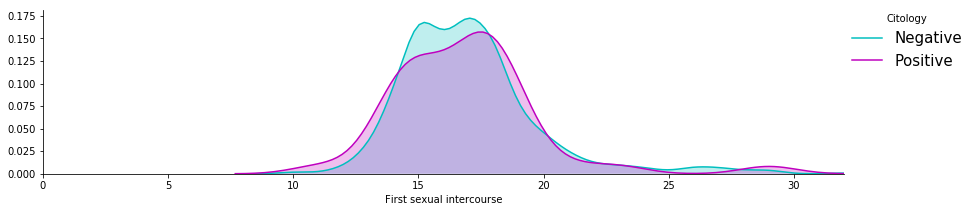

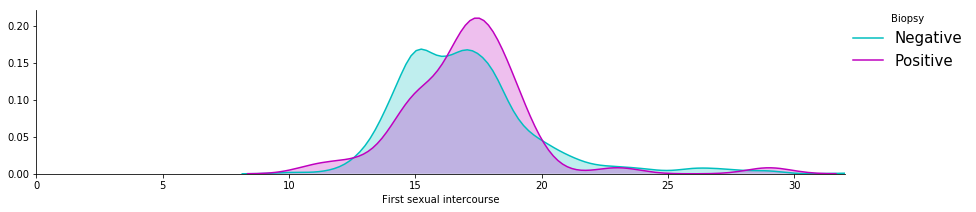

In [13]:
for feature in diagnosis_type:
    fig = sns.FacetGrid(data,hue=feature,aspect=4, palette = ['c', 'm'])
    fig.map(sns.kdeplot,'First sexual intercourse',shade=True)
    oldest = data['First sexual intercourse'].max()
    fig.set(xlim=(0,oldest))
    fig.add_legend(labels=["Negative","Positive"], fontsize='15')



## Number of pregnancies
Histogram of distribution of the number of pregnancies of the four different diagnosis types

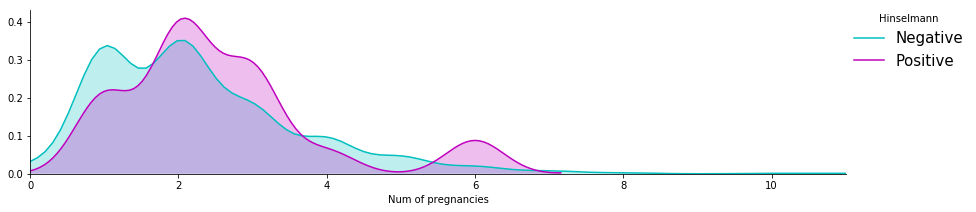

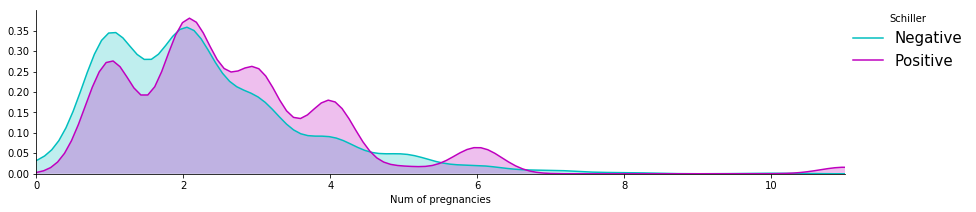

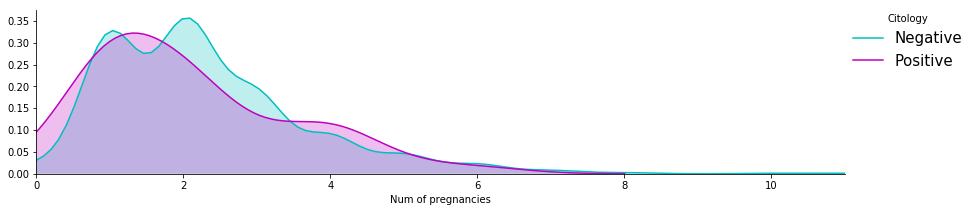

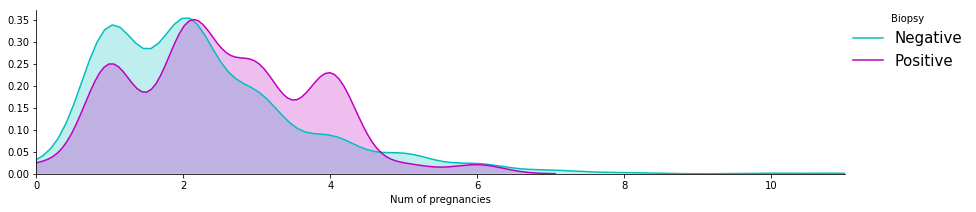

In [14]:
for feature in diagnosis_type:
    fig = sns.FacetGrid(data,hue=feature,aspect=4, palette = ['c', 'm'])
    fig.map(sns.kdeplot,'Num of pregnancies',shade=True)
    oldest = data['Num of pregnancies'].max()
    fig.set(xlim=(0,oldest))
    fig.add_legend(labels=["Negative","Positive"], fontsize='15')

## Years of smoking
Histogram of number of years of smoking for the four different diagnosis types

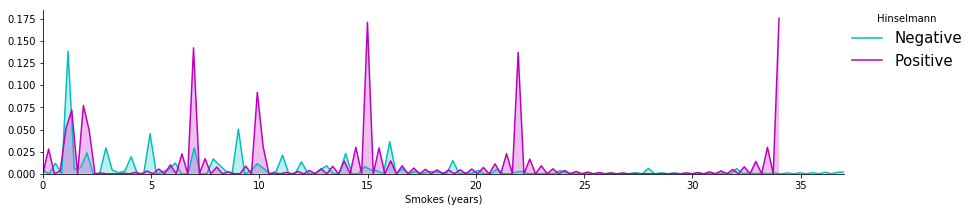

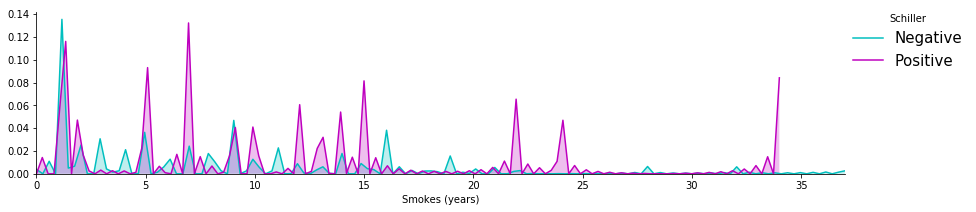

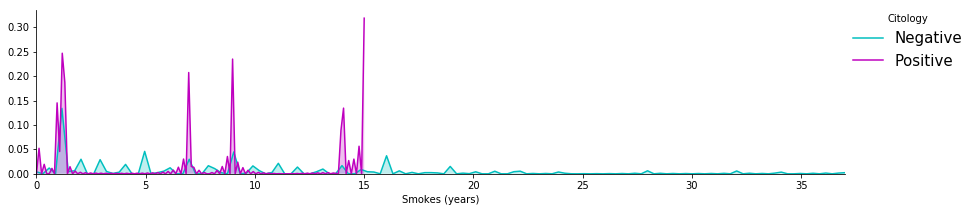

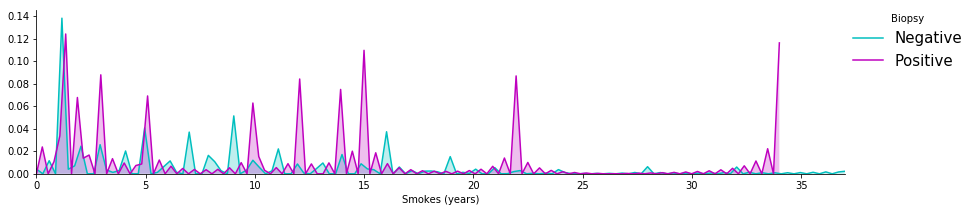

In [15]:
for feature in diagnosis_type:
    fig = sns.FacetGrid(data,hue=feature,aspect=4, palette = ['c', 'm'])
    fig.map(sns.kdeplot,'Smokes (years)',shade=True)
    oldest = data['Smokes (years)'].max()
    fig.set(xlim=(0,oldest))
    fig.add_legend(labels=["Negative","Positive"], fontsize='15')



## Hormonal Contraceptives distribution
Histogram of the hormonal contraceptives distribution in years of the four different diagnosis types

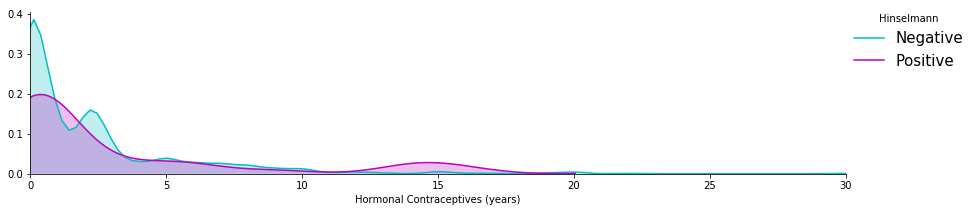

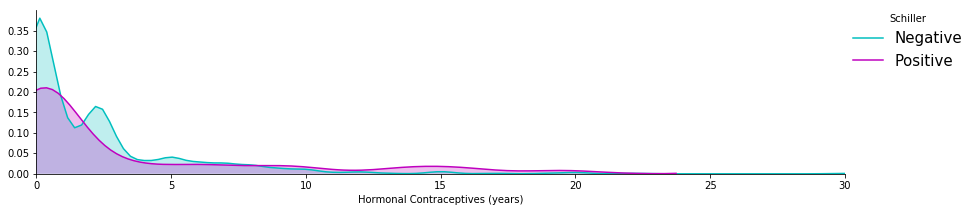

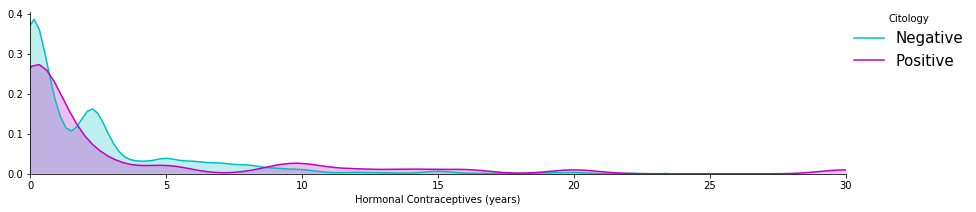

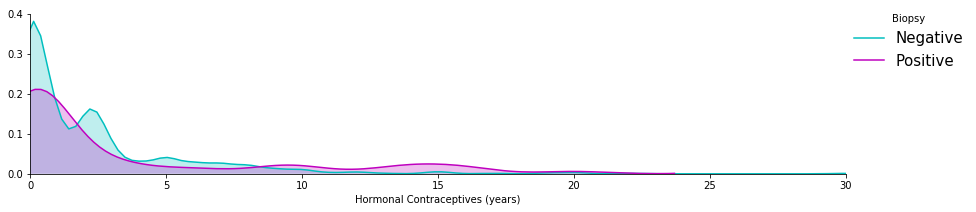

In [16]:
for feature in diagnosis_type:
    fig = sns.FacetGrid(data,hue=feature,aspect=4,palette = ['c', 'm'])
    fig.map(sns.kdeplot,'Hormonal Contraceptives (years)',shade=True)
    oldest = data['Hormonal Contraceptives (years)'].max()
    fig.set(xlim=(0,oldest))
    fig.add_legend(labels=["Negative","Positive"], fontsize='15')

## Years of having IUD
Histogram of the distribution of having an intrurine device (IUD) in years of the four different diagnosis types.

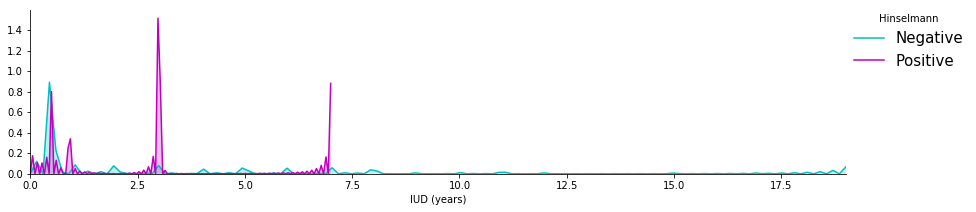

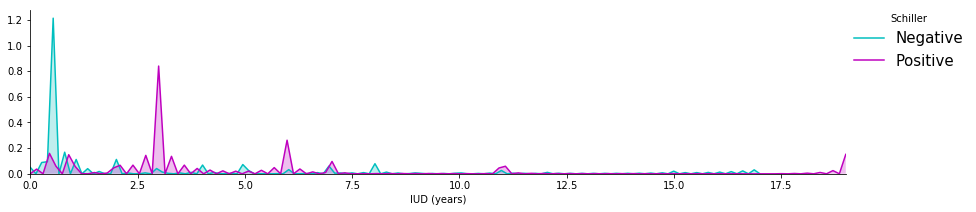

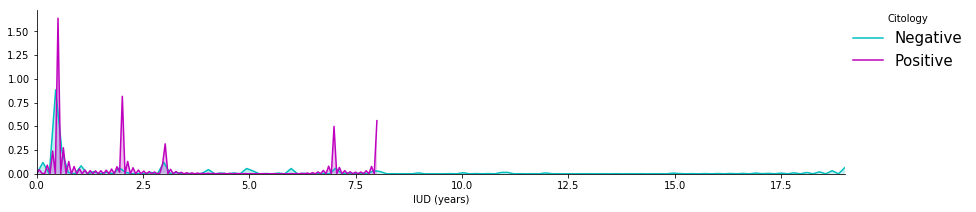

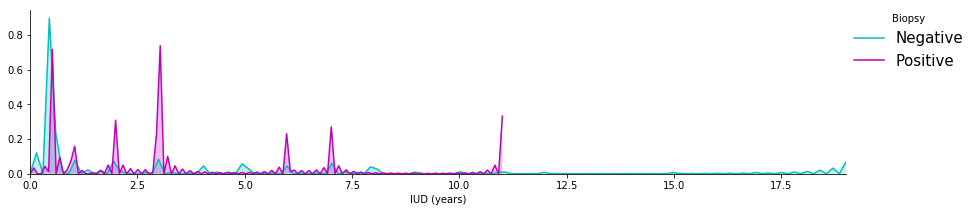

In [17]:
for feature in diagnosis_type:
    fig = sns.FacetGrid(data,hue=feature,aspect=4,palette = ['c', 'm'])
    fig.map(sns.kdeplot,'IUD (years)',shade=True)
    oldest = data['IUD (years)'].max()
    fig.set(xlim=(0,oldest))
    fig.add_legend(labels=["Negative","Positive"], fontsize='15')

# Number of STDs
Histogram of the number of previous and current STDs on the four different diagnosis types

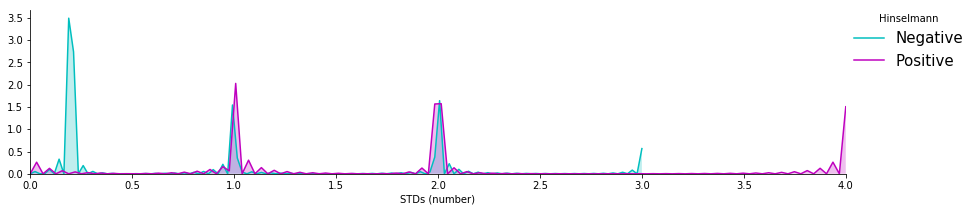

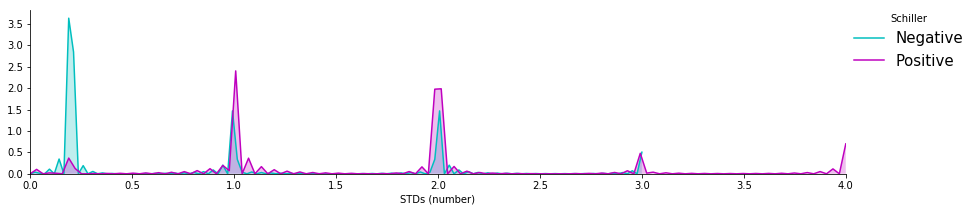

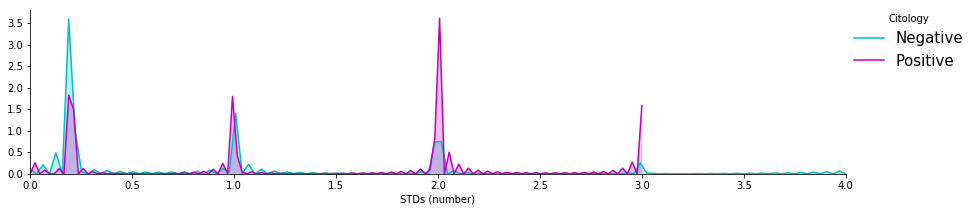

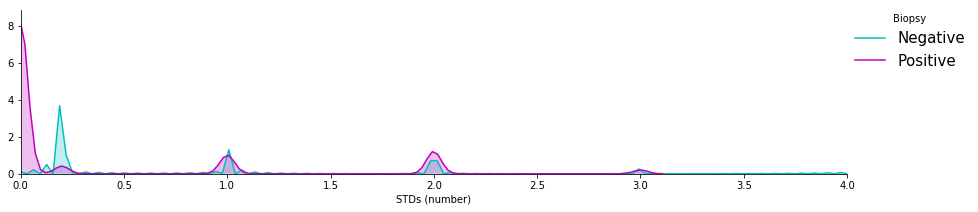

In [18]:
for feature in diagnosis_type:
    fig = sns.FacetGrid(data,hue=feature,aspect=4,palette = ['c', 'm'])
    fig.map(sns.kdeplot,'STDs (number)',shade=True)
    oldest = data['STDs (number)'].max()
    fig.set(xlim=(0,oldest))
    fig.add_legend(labels=["Negative","Positive"], fontsize='15')



# Analysis
Starting by seperating the labels (i.e the results of the four different diagnosis tests) from the dataset

In [35]:
data_features = data.drop(['Hinselmann', 'Schiller', 'Citology','Biopsy'],axis=1)
data_label = pd.DataFrame(data=data['Hinselmann'])
data_label['Schiller'] = data['Schiller']
data_label['Citology'] = data['Citology']
data_label['Biopsy'] = data['Biopsy']

## Declaring output 
Next, the output needs to be defined properly by fusing the four different output labels together. This is done by creating a risk value defined by the number positive results of the four different diagnosis tests. A risk value of *4* is the highest meaning the person have positive test results on all four diagnosis tests and *0* being all negative meaning lowest risk value.

In [36]:
def declaring_output(label):
    hinselmann, schiller, citology, biopsy = label
    return hinselmann+schiller+citology+biopsy

data_label['cervical_cancer'] = data_label[['Hinselmann', 'Schiller', 
                                                      'Citology','Biopsy']].apply(declaring_output,axis=1)

print('Number of values for each label variable:\n', data_label['cervical_cancer'].value_counts())

Number of values for each label variable:
 0    756
1     41
3     33
2     22
4      6
Name: cervical_cancer, dtype: int64


## Transform data 
Data is being transformed into a workable dataset of input and output vectors where the input vector *data_features* contains all the values of all the different features from all the collected subjects and *data_label* contains the risk value defined as above on all corresponding to all the collected subjects.

In [37]:
data_label.drop(['Hinselmann', 'Schiller', 'Citology','Biopsy'],axis=1,inplace=True)
data_label = data_label.astype(int)
data_label = data_label.values.ravel()

print('Feature vector shape:',data_features.shape)
print('Target vector shape',data_label.shape)

Feature vector shape: (858, 30)
Target vector shape (858,)


## Unbalanced classes
As seen in the number of values for each label variable, the classes are unbalanced. This will imply a weighted learning meaning that the model will prioritize the classes with most amount of corresponding data and not be able to learn the others as good. This is approached using an oversampling technique (creating artificiall data) called *ADASYN*. ADASYN (Adaptive Synthetic) sampling method is a technique used for imbalanced datasets to increase data of the minority classes and can be implemented by the python module *imbalanced_learn*.


In [38]:
from imblearn.over_sampling import ADASYN
data_features_oversamp, data_label_oversamp = ADASYN().fit_sample(data_features, data_label)

## Dividing Dataset
To test how well the model performs, it is evaluated on, new unseen, test data. This test data is chosen by dividing the dataset into a train and test set with a test to train ratio of $30$% picked randomly.

In [287]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features_oversamp, 
                                                    data_label_oversamp,
                                                    test_size=0.3, 
                                                    shuffle=True)

## Normalizing Data
Since the values of the different features ranges from different intervals, the data also needs to be normalized.

In [345]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

# Model 
## Implementation
After the preprocessing is complete, the machine learning model is created. Here, the *XGBoost* is chosen. XGBoost uses __gradient boosting decision tree__ algorithm (also called *multiple additive regression trees*). Gradient boosting is an iterative approach were new models are predicting the errors (or residuals) of the prior models which are added together. It uses *gradient descent* as optimization algorithm. 

In [288]:
import xgboost
model = xgboost.XGBClassifier()

## Train the model
Training the model on the train set containing the features of each training sample and its corresponding label.

In [289]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Prediction
Makes predictions on all the test samples.

In [290]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

## Evaluation
Evaluate the model from the test result by computing the accuracy and creating both a confusion matrix and classification report to plot the performance for each label variable and the different evaluation scores - *f1-score*, *precision* and *recall*.

In [292]:
acc_list = (y_pred == y_test).astype(int)
acc = (sum(acc_list) / len(acc_list))
print('Accuracy from the test set: {:.2f}%'.format(acc*100))

Accuracy from the test set: 95.65%


In [293]:
from sklearn.metrics import confusion_matrix, classification_report

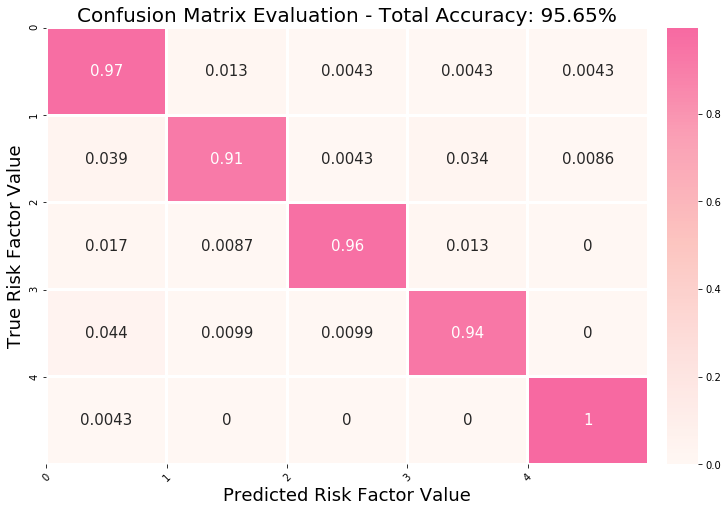

In [348]:
# Confusion matrix
cm = confusion_matrix(y_test, predictions)
cmNorm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,7))
sns.heatmap(cmNorm, annot=True, cmap="RdPu",
          center=True, linewidths=2, annot_kws={'size': 15})
tick_marks = np.arange(5)
plt.xticks(tick_marks, range(5), rotation=45)
plt.yticks(tick_marks, range(5))
plt.xlabel("Predicted Risk Factor Value", fontsize=18)
plt.ylabel("True Risk Factor Value", fontsize=18)
plt.title('Confusion Matrix Evaluation - Total Accuracy: {:.2f}%'.format(acc*100), fontsize=20)
plt.show()


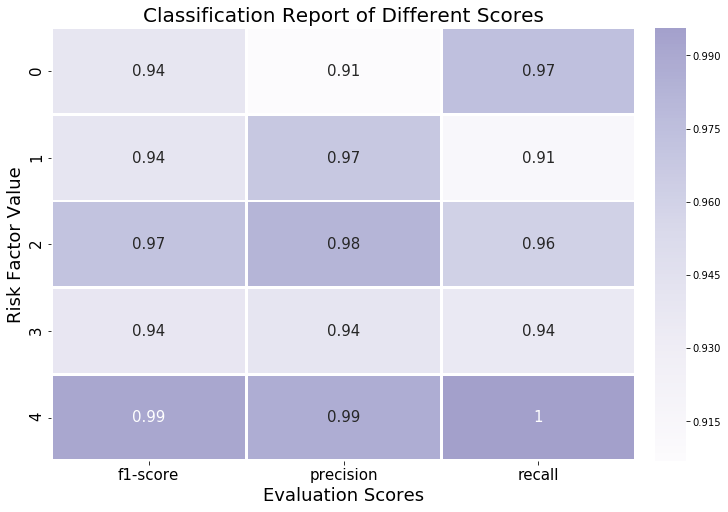

In [349]:
# Classification Report
clf_report = classification_report(y_test,
                                   predictions,
                                   labels=np.arange(5),
                                   target_names=list('01234'),
                                   output_dict=True)

plt.figure(figsize=(10,7))
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :-3].T, annot=True, cmap='Purples',
           center=True, linewidths=2, annot_kws={'size':15})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Risk Factor Value", fontsize=18)
plt.xlabel("Evaluation Scores", fontsize=18)
plt.title('Classification Report of Different Scores', fontsize=20)

plt.show()

# Comparing To Other Methods
Just for validate the performance of the chosen ML method, a traditional SVM classifier is tested on the same data

In [350]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
acc_list_svc = (y_pred_svc == y_test).astype(int)
acc_svc = (sum(acc_list_svc) / len(acc_list_svc))
print('Accuracy from the test set when using a SVM classifier: {:.2f}%'.format(acc_svc*100))

Accuracy from the test set when using a SVM classifier: 69.54%


As can be seen, the perfomance of the chosen approach is performing alot better than the traditional, basic classification method support vector machine.

# Test subject
Let's now create a test subject and see the risk factor this person has with the model above. Our test subject is of age *26*, *11* sex partners with first sexual intercourse of age of *16* and smokes *3* packs of cigarettes a year. Furthermore, the subject has had *2* pregnancies, has and has had hormonal contraceptives for four months, IUD in *9* years and also *2* STDs (non at the moment). 
<br>
<br>
The data table for the subject is thus listed as below:

In [344]:
test_subject = np.array([[26,11,16,2,0,0,3,1,0.3,
                          1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0]])
test_subject_df = pd.DataFrame(test_subject, columns = [f'{i}' for i in list(data_features)], index= ['Test Subject'])
print(test_subject_df.iloc[0])

Age                                   26.0
Number of sexual partners             11.0
First sexual intercourse              16.0
Num of pregnancies                     2.0
Smokes                                 0.0
Smokes (years)                         0.0
Smokes (packs/year)                    3.0
Hormonal Contraceptives                1.0
Hormonal Contraceptives (years)        0.3
IUD                                    1.0
IUD (years)                            9.0
STDs                                   0.0
STDs (number)                          0.0
STDs:condylomatosis                    0.0
STDs:cervical condylomatosis           0.0
STDs:vaginal condylomatosis            0.0
STDs:vulvo-perineal condylomatosis     0.0
STDs:syphilis                          0.0
STDs:pelvic inflammatory disease       0.0
STDs:genital herpes                    0.0
STDs:molluscum contagiosum             0.0
STDs:AIDS                              0.0
STDs:HIV                               0.0
STDs:Hepati

## Risk Prediction on Test Subject
The risk on a scale of zero to four of testing positive on having ceverical cancer is evaluated, based on the trained model, to

In [338]:
test_sub_pred = model.predict(test_subject)
print(f'Predicted Risk Level of having ceverical cancer is: {int(test_sub_pred)}')

Predicted Risk Level of having ceverical cancer is: 0


which is good!

Suggest now that the same subject instead has had hormonal contraceptives for *3* years and currently has an STD of cervical condylomatosis. Furthermore the subject is, and has been a smoker for *8* years and smoke *50* packs a year. The feature table would instead be

In [342]:
test_subject = np.array([[26,11,16,2,1,8,50,1,3,
                          0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0]]) 
test_subject_df = pd.DataFrame(test_subject, columns = [f'{i}' for i in list(data_features)], index= ['Test Subject'])
print(test_subject_df.iloc[0])

Age                                   26
Number of sexual partners             11
First sexual intercourse              16
Num of pregnancies                     2
Smokes                                 1
Smokes (years)                         8
Smokes (packs/year)                   50
Hormonal Contraceptives                1
Hormonal Contraceptives (years)        3
IUD                                    0
IUD (years)                            0
STDs                                   1
STDs (number)                          1
STDs:condylomatosis                    0
STDs:cervical condylomatosis           1
STDs:vaginal condylomatosis            0
STDs:vulvo-perineal condylomatosis     0
STDs:syphilis                          0
STDs:pelvic inflammatory disease       0
STDs:genital herpes                    0
STDs:molluscum contagiosum             0
STDs:AIDS                              0
STDs:HIV                               0
STDs:Hepatitis B                       0
STDs:HPV        

array([1])

and the predicted risk level is now

In [343]:
new_test_sub_pred = model.predict(test_subject)
print(f'Predicted Risk Level of having ceverical cancer is: {int(new_test_sub_pred)}')

Predicted Risk Level of having ceverical cancer is: 1


which make sense that an increase of these risk factors will also increase the risk of the subject having ceverical cancer.